In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

## Spliting
Genrando la partición de la muestra de entranamiento y de evaluación

In [105]:
Total = pd.read_excel("matriz_final_1.xlsx", skiprows=1) # importando

In [106]:
Total.shape # tamaño del dataset

(101, 14246)

In [107]:
Total = Total.iloc[:,1:] #eliminando primera columna
y = Total.loc[:,"Clasificador"] # Extrayendo clases
Total.drop(columns="Clasificador", axis=0, inplace=True) #Eliminando y de la matriz de entrada
Total.shape

(101, 14244)

In [20]:
Malas = Total.iloc[np.where(y==1, True, False),:]
bad_words = ['pendej', 'arrech', 'bander', 'birloch', 'nac',
             'tet', 'lol', 'burr', 'cojud', 'sons', 'estup',
             'mierd', 'imbecil', 'inutil', 'camot', 'capocaser',
             'chach', 'chacot', 'chaki', 'chang', 'chanch', 'che',
             'choc', 'negr', 'choler', 'chol', 'cod', 'coim',
             'corch', 'cul', 'ano', 'empanad', 'fresc', 'jailon',
             'lloqall', 'manc', 'marac', 'morf', '�at', 'opa',
             'pachang', 'padr', 'paj', 'pajpaku', 'peg', 'perr',
             'pichi', 'plat', 'puch', 'ray', 'opasex', 'porn',
             'xxx', 'amor', 'gust', 'encant', 'enamor',
             'dese', 'conocert', 'fot', 'perfil', 'llam',
             'atencion', 'quier', 'conocert', 'sol', 'andas',
             'amig', 'niñ', 'bell', 'dulc', 'hermos', 'precios',
             'hac', 'pod', 'envi', 'tuy', 'vert', 'mejor', 'lind',
             'sal', 'audi', 'vide', 'esuchart', 'voz', 'ati',
             'curi', 'veam', 'person', 'amig', 'parej', 'novi',
             'viv', 'estudi', 'music', 'gustari', 'conoc',
             'princes', 'trabaj', 'hor', 'habl', 'contig', 'aburr',
             'jug', 'perdon', 'dia', 'noch', 'felic', 'hoy',
             'especial', 'intes', 'trabaj', 'dar', 'informacion',
             'busc', 'busc', 'ten', 'experient', 'sueld', 'gananci',
             'mes', 'seman', 'ofert', 'laboral', 'ayud', 'econom',
             'sol', 'busc', 'chic', 'chic', 'joven', 'señorit',
             'buen', 'presenci', 'medi', 'tiemp', 'complet',
             'progres', 'realiz', 'viaj', 'interior', 'exterior',
             'pai', 'departament', 'disponibil', 'urgent',
             'inmediat', 'super', 'crec']
len(bad_words)
# Extrayendo lo elementos únicos
bad = []
for i in bad_words:
    if i in Total.columns:
        bad.append(i)

In [148]:
A = np.array(bad)
A.tofile("a.txt", sep = ";")

In [108]:
Total.loc[np.where(y==1, True, False),bad] = Total.loc[np.where(y==1, True, False),bad] + 5 


# Realizando la segmentación TF-IDF
Podemos observar la matriz de TF con la matriz de conteo de frecuencias absolutas 

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer #importando TD IDF de sklearn
transformer = TfidfTransformer(smooth_idf=False) ##seteandola en la función transformer
transformer   

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

Hallando el TF-IDF 
$$TF - IDF(t,d) = tf(t,d)\ x\ idf(t) $$

In [110]:
tfidf = transformer.fit_transform(Total.values) # aplicando la funcion Tf Idf al data set 
tfidf 
X = tfidf.toarray()

In [111]:
X

array([[0.00286206, 0.01402434, 0.00272162, ..., 0.00544323, 0.00849986,
        0.01133315],
       [0.00573434, 0.01123951, 0.00272648, ..., 0.01363238, 0.0056767 ,
        0.        ],
       [0.00281476, 0.01103407, 0.00535328, ..., 0.00802992, 0.01393234,
        0.00557293],
       ...,
       [0.00562343, 0.00275553, 0.00534749, ..., 0.        , 0.0111338 ,
        0.        ],
       [0.00571668, 0.0112049 , 0.01359041, ..., 0.01359041, 0.01414804,
        0.00565922],
       [0.01128828, 0.00276568, 0.00268359, ..., 0.00536718, 0.01117482,
        0.0027937 ]])

In [112]:
## Separando las muestras de entrenamiento y de control 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=123) # Semilla = random_state 

In [113]:
X_train.shape

(80, 14244)

In [114]:
X_test.shape

(21, 14244)

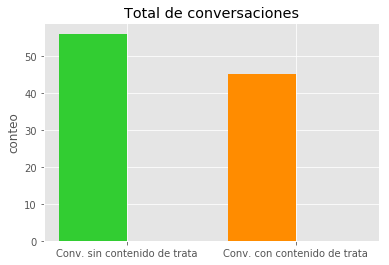

In [115]:
fig , ax = plt.subplots(1) #Distribucion total
cv, cm = ax.bar(("Conv. sin contenido de trata", "Conv. con contenido de trata"),[56,45])
cm.set_facecolor("darkorange")
cm.set_width(0.4)
cv.set_facecolor("limegreen")
cv.set_width(0.4)
ax.set_ylabel("conteo")
ax.set_title("Total de conversaciones")
fig.savefig("Total.pdf")

In [116]:
sumRow = Total.sum(axis=1)
sumRow.values
TotalPer = Total.div(sumRow, axis=0)
impRel = TotalPer.mean(axis=0)
(impRel.sort_values(ascending=False)*100)[:10]


amig       0.014234
dia        0.014228
arrech     0.014116
conoc      0.014036
birloch    0.013979
burr       0.013931
corch      0.013929
opa        0.013904
busc       0.013902
chaki      0.013815
dtype: float64

## Definiendo la arquitectura de la red neuronal

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [118]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0 ,nesterov=True)
rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad =  keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

In [119]:
model = Sequential()

model.add(Dense(500, activation='relu', input_shape=(14244,)))

model.add(Dense(200, activation='sigmoid'))

model.add(Dense(500, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [120]:
# Model output shape
model.output_shape


(None, 1)

In [121]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               7122500   
_________________________________________________________________
dense_10 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 501       
Total params: 7,323,701
Trainable params: 7,323,701
Non-trainable params: 0
_________________________________________________________________


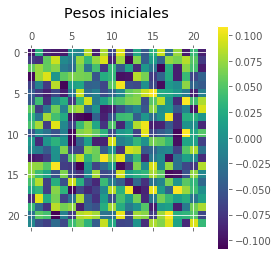

In [122]:
W0 = model.get_weights()[6]
W0 = W0[:484]
W0 = W0.reshape(22,22)
plt.matshow(W0)
plt.colorbar()
plt.title("Pesos iniciales\n")
plt.savefig("PesosIniciales.png")

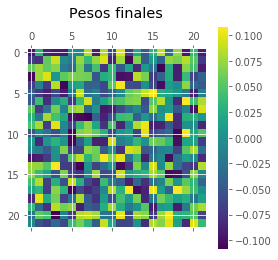

In [123]:
W1 = model.get_weights()[6]
W1 = W1[:484]
W1 = W1.reshape(22,22)
plt.matshow(W1)
plt.colorbar()
plt.title("Pesos finales\n")
plt.savefig("PesosFinales.png")

In [144]:
bad

['pendej',
 'arrech',
 'birloch',
 'nac',
 'lol',
 'burr',
 'cojud',
 'sons',
 'estup',
 'mierd',
 'inutil',
 'chach',
 'chaki',
 'chang',
 'chanch',
 'che',
 'choc',
 'negr',
 'cod',
 'coim',
 'corch',
 'cul',
 'fresc',
 'jailon',
 'manc',
 'marac',
 'morf',
 'opa',
 'padr',
 'paj',
 'peg',
 'perr',
 'pichi',
 'plat',
 'puch',
 'ray',
 'porn',
 'xxx',
 'amor',
 'gust',
 'encant',
 'enamor',
 'conocert',
 'fot',
 'perfil',
 'llam',
 'atencion',
 'quier',
 'conocert',
 'sol',
 'andas',
 'amig',
 'bell',
 'dulc',
 'hac',
 'pod',
 'envi',
 'tuy',
 'vert',
 'mejor',
 'lind',
 'sal',
 'audi',
 'esuchart',
 'voz',
 'ati',
 'curi',
 'veam',
 'person',
 'amig',
 'parej',
 'novi',
 'viv',
 'estudi',
 'music',
 'gustari',
 'conoc',
 'trabaj',
 'hor',
 'habl',
 'contig',
 'aburr',
 'jug',
 'perdon',
 'dia',
 'noch',
 'felic',
 'hoy',
 'especial',
 'intes',
 'trabaj',
 'dar',
 'informacion',
 'busc',
 'busc',
 'ten',
 'experient',
 'sueld',
 'gananci',
 'mes',
 'ofert',
 'laboral',
 'ayud',
 'econ

## Entrenando la RED

In [124]:
from keras.callbacks import History 
history = History()

In [125]:
np.random.seed(123)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [126]:
np.random.seed(2222)
model.fit(X_train, y_train,epochs=40, batch_size=40, verbose=1,callbacks=[history],)

Epoch 1/40
80/80 [==============================] - 1s 13ms/step - loss: 0.7517 - acc: 0.5000
Epoch 2/40
80/80 [==============================] - 0s 5ms/step - loss: 0.7252 - acc: 0.4500
Epoch 3/40
80/80 [==============================] - 0s 5ms/step - loss: 0.7235 - acc: 0.4250
Epoch 4/40
80/80 [==============================] - 0s 5ms/step - loss: 0.6747 - acc: 0.5750
Epoch 5/40
80/80 [==============================] - 0s 5ms/step - loss: 0.7070 - acc: 0.5750
Epoch 6/40
80/80 [==============================] - 0s 5ms/step - loss: 0.6918 - acc: 0.5750
Epoch 7/40
80/80 [==============================] - 0s 4ms/step - loss: 0.6721 - acc: 0.5750
Epoch 8/40
80/80 [==============================] - 0s 5ms/step - loss: 0.6842 - acc: 0.9875
Epoch 9/40
80/80 [==============================] - 0s 5ms/step - loss: 0.6784 - acc: 0.5750
Epoch 10/40
80/80 [==============================] - 0s 5ms/step - loss: 0.6710 - acc: 0.5750
Epoch 11/40
80/80 [==============================] - 0s 5ms/step - l

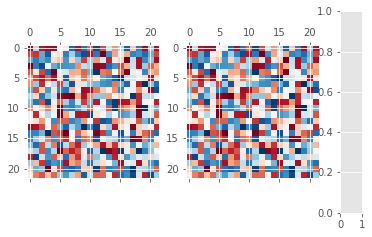

In [127]:
fig, ax = plt.subplots(1,2)
ax[0].matshow(W0, cmap = plt.cm.RdBu)
ax[1].matshow(W1, cmap = plt.cm.RdBu)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])


In [92]:
W0.flatten()

array([-9.50137004e-02,  2.97780558e-02, -8.67894143e-02, -9.35435593e-02,
       -9.41332504e-02, -7.90044665e-04, -1.08787194e-02,  8.56442675e-02,
       -9.04415324e-02,  8.09507743e-02, -6.12286143e-02,  9.83758047e-02,
       -6.90031126e-02,  2.24503204e-02, -4.68009487e-02,  3.00551429e-02,
        8.95644650e-02, -3.06259468e-02,  7.56300017e-02, -9.29243043e-02,
        3.89666185e-02, -8.98940265e-02, -6.99904636e-02, -7.77187496e-02,
        5.60235158e-02,  9.12303701e-02, -5.59425354e-03, -1.71647817e-02,
        7.41829053e-02,  3.72893736e-02,  7.42604658e-02,  9.65189710e-02,
       -8.68382081e-02,  7.75805935e-02, -1.05619766e-01,  6.73813745e-02,
       -4.27301750e-02,  1.31354406e-02, -4.16781157e-02,  7.35177323e-02,
        6.38854727e-02,  8.44599530e-02,  5.26364669e-02, -7.18535185e-02,
        5.65730855e-02,  7.61650577e-02,  5.61185405e-02,  6.95003346e-02,
       -1.81527585e-02, -3.07273865e-02,  6.34847358e-02, -2.55311057e-02,
        4.38238457e-02, -

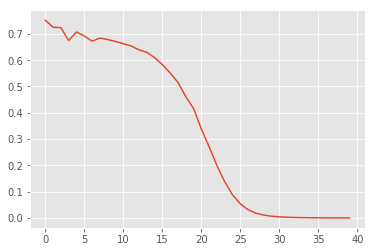

In [128]:
plt.plot(history.history["loss"])
plt.savefig("función de costo.png")

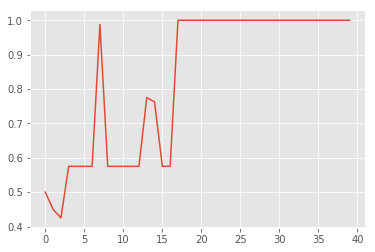

In [129]:
plt.plot(history.history["acc"])
plt.savefig("precisión del modelo.png")

In [130]:
y_train[:5]

88    0
19    1
29    1
31    0
91    0
Name: Clasificador, dtype: int64

## Generando las predicciones

In [131]:
y_pred = model.predict_classes(X_train) # 
y_pred[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [132]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

21/21 [==============================] - 0s 6ms/step
[0.23310361802577972, 0.9523809552192688]


## Evaluando el modelo 

In [133]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [134]:
for y_t, yhat in zip(y_test , y_pred):
    print (y_t, yhat)

1 [0]
0 [1]
1 [1]
1 [0]
0 [0]
0 [0]
1 [0]
0 [0]
1 [1]
1 [1]
1 [0]
1 [0]
0 [1]
1 [0]
0 [1]
0 [1]
1 [0]
0 [1]
0 [1]
0 [0]
1 [1]


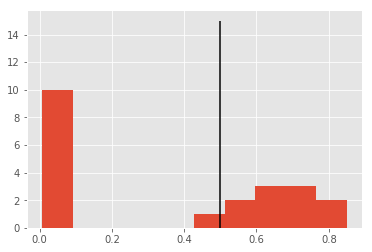

In [139]:
model.predict_proba(X_test)[np.where(y_test == 0, True, False)]
plt.hist(model.predict_proba(X_test))
plt.vlines(0.5, 0 ,15)

In [140]:
# Confusion matrix en valores absolutos  solamente el test 
y_pred = np.where(model.predict_proba(X_test)>0.18,1,0)
print(confusion_matrix(y_test, y_pred) )
print(precision_score(y_test, y_pred))
print(f1_score(y_test,y_pred))

[[10  0]
 [ 0 11]]
1.0
1.0


In [141]:
## Considerando todo el data set 
y_hat_prob = np.where(model.predict_proba(X)>0.41,1,0)
print(confusion_matrix(y, y_hat_prob) )
print(precision_score(y, y_hat_prob))
print(f1_score(y,y_hat_prob))

[[56  0]
 [ 0 45]]
1.0
1.0


# Guardando los pesos

In [142]:
model.save("models/ModeloADAM0.75") 

In [143]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

21/21 [==============================] - 0s 1ms/step
[0.23310361802577972, 0.9523809552192688]


In [37]:
#model.load_weights("models/ModeloADAM0.95")

In [38]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

21/21 [==============================] - 0s 813us/step
[0.6891007423400879, 0.523809552192688]
